In [1]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'mrc_cosine_distance.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,Name,test_tydiqa_exact_match,test_xquad_exact_match,Created,Runtime,End Time,ID,Notes,State,Updated,...,test_f1,test_tydiqa_f1,test_xquad_f1,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1
0,th_wordnet_aug_1.0,40.238780,32.796610,2023-08-31T18:53:58.000Z,1575,2023-08-31T19:20:13.000Z,yhde47c9,-,finished,2023-08-31T19:20:13.000Z,...,54.140286,55.533338,48.800646,38303818190876160,1.305399,1425.8065,126.539,1.978,50.709220,62.747362
1,th_wordnet_aug_0.9,41.123148,33.644068,2023-08-31T18:27:53.000Z,1502,2023-08-31T18:52:55.000Z,jvki7gyz,-,finished,2023-08-31T18:52:55.000Z,...,54.522608,56.136859,48.335103,36388839584947200,1.272824,1357.7328,126.240,1.974,50.620567,62.870342
2,th_wordnet_aug_0.8,41.609551,33.559322,2023-08-31T18:02:56.000Z,1434,2023-08-31T18:26:50.000Z,n89jf4b3,-,finished,2023-08-31T18:26:50.000Z,...,55.071958,56.645867,49.039085,34473860979018240,1.283190,1289.8767,125.888,1.969,51.684397,63.779671
3,th_wordnet_aug_0.7,41.034711,33.305085,2023-08-31T17:39:09.000Z,1364,2023-08-31T18:01:53.000Z,jfrvaznk,-,finished,2023-08-31T18:01:53.000Z,...,54.516264,56.090129,48.483559,32558882373089280,1.359049,1221.7292,125.527,1.964,52.526596,64.220596
4,th_wordnet_aug_0.6,39.089100,32.796610,2023-08-31T17:16:34.000Z,1292,2023-08-31T17:38:06.000Z,2wziqc6r,-,finished,2023-08-31T17:38:06.000Z,...,53.729040,55.132968,48.347711,30643903767160320,1.315584,1153.4173,125.141,1.959,50.576241,62.590742
5,th_wordnet_aug_0.5,41.145258,33.728814,2023-08-31T16:55:14.000Z,1217,2023-08-31T17:15:31.000Z,16s2h736,-,finished,2023-08-31T17:15:31.000Z,...,54.704084,56.234108,48.839426,28659926486405760,1.346898,1082.6532,124.980,1.949,51.906028,63.786814
6,th_wordnet_aug_0.4,42.317046,33.644068,2023-08-31T16:35:00.000Z,1151,2023-08-31T16:54:11.000Z,bfl3mzhx,-,finished,2023-08-31T16:54:11.000Z,...,54.708320,56.205782,48.968470,26746221702165890,1.370610,1015.1371,124.407,1.941,52.349291,63.722880
7,th_wordnet_aug_0.3,37.408799,31.779661,2023-08-31T16:15:59.000Z,1078,2023-08-31T16:33:57.000Z,6bcu7cad,-,finished,2023-08-31T16:33:57.000Z,...,53.045611,54.362602,47.997515,24832516917926016,1.460784,946.3473,123.919,1.934,51.063830,62.895771
8,th_wordnet_aug_0.2,39.509175,32.288136,2023-08-31T15:58:08.000Z,1008,2023-08-31T16:14:56.000Z,ydodjnfi,-,finished,2023-08-31T16:14:56.000Z,...,53.659514,55.248403,47.569226,22918812133686144,1.572102,878.3989,123.236,1.924,50.265957,62.492657
9,th_wordnet_aug_0.1,39.973469,33.220339,2023-08-31T15:41:28.000Z,937,2023-08-31T15:57:05.000Z,ov2iebe6,-,finished,2023-08-31T15:57:05.000Z,...,53.759032,55.256569,48.018898,21005107349446270,1.730244,809.6169,122.564,1.914,49.468085,61.620623


In [2]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
    "th_thai2trans_aug": "Thai2Transformers"
}

In [3]:
# Function to extract the augmentation type from the name
def get_augmentation_type(name):
    if name == "original":
        return "original"
    return name.rsplit("_", 2)[0]

# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name.rsplit("_", 1)[-1]

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    base_name = name.rsplit("_", 1)[0]
    return pretty_names[base_name]


# Apply the function to create a new column with the augmentation type
data['augmentation_type'] = data['Name'].apply(get_augmentation_type)

# Find the best performing model for each augmentation type based on the "test_exact_match" metric
best_models = data.loc[data.groupby('augmentation_type')['test_f1'].idxmax()]

# Resetting the index
best_models.reset_index(drop=True, inplace=True)

# Apply the functions to create the new columns
best_models['augment_ratio'] = best_models['Name'].apply(get_augment_ratio)
best_models['pretty_name'] = best_models['Name'].apply(get_pretty_name)

# Displaying the results
best_models[['Name', 'pretty_name', 'test_exact_match']]

,Name,pretty_name,test_exact_match
0,original,Original,38.523584
1,th_aug_0.4,Backtranslation,40.329651
2,th_fasttext_aug_0.9,FastText,39.593197
3,th_llm_gec_aug_0.4,LLM GEC,40.697878
4,th_llm_paraphrase_aug_0.7,LLM Paraphrase,40.592671
5,th_ltw2v_aug_1.0,LTW2Vec,39.961424
6,th_qcpg_0.2_aug_0.1,QCPG (0.2),39.487989
7,th_qcpg_0.2_llm_gec_aug_0.1,QCPG (0.2) + LLM GEC,40.382255
8,th_qcpg_0.5_aug_0.1,QCPG (0.5),39.084692
9,th_qcpg_0.5_llm_gec_aug_0.8,QCPG (0.5) + LLM GEC,39.680870


## Table Export

In [4]:
# Selecting columns that begin with "test" along with the "Name" column
test_columns = [col for col in data.columns if col.startswith("test")]
selected_columns = ['pretty_name', 'augment_ratio', "val_exact_match", "val_f1", "test_tydiqa_exact_match", "test_tydiqa_f1", "test_xquad_exact_match", "test_xquad_f1"]

# Selecting the relevant columns from the best models
best_models_test_metrics = best_models[selected_columns]

# Sorting the results by "test_exact_match" in descending order
best_models_test_metrics_sorted = best_models_test_metrics.sort_values(by='test_tydiqa_exact_match', ascending=True)

# Displaying the sorted results
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
0,Original,N/A,50.753546,62.397943,39.464957,54.870764,34.915254,48.795739
8,QCPG (0.5),0.1,50.753546,62.277910,40.415653,55.397080,33.983051,48.705167
5,LTW2Vec,1.0,52.127660,63.832415,41.300022,56.618192,34.830508,50.026146
12,Thai2Fit,0.3,50.443262,62.124697,41.344241,55.910162,33.559322,49.497574
6,QCPG (0.2),0.1,50.177305,62.093328,41.366350,55.944739,32.288136,47.392068
2,FastText,0.9,51.019504,62.728156,41.388459,56.155123,32.711864,47.667466
9,QCPG (0.5) + LLM GEC,0.8,50.620567,61.971264,41.476896,55.427957,32.796610,47.638017
14,WordNet,0.8,51.684397,63.779671,41.609551,56.645867,33.559322,49.039085
7,QCPG (0.2) + LLM GEC,0.1,51.108156,62.777721,41.764316,56.053190,35.084746,49.113261
1,Backtranslation,0.4,50.797872,62.669976,42.007517,56.433435,33.898305,48.039027


In [5]:
# Round all numerical columns to 2 decimal places
best_models_test_metrics_sorted = best_models_test_metrics_sorted.round(2)
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
0,Original,N/A,50.75,62.40,39.46,54.87,34.92,48.80
8,QCPG (0.5),0.1,50.75,62.28,40.42,55.40,33.98,48.71
5,LTW2Vec,1.0,52.13,63.83,41.30,56.62,34.83,50.03
12,Thai2Fit,0.3,50.44,62.12,41.34,55.91,33.56,49.50
6,QCPG (0.2),0.1,50.18,62.09,41.37,55.94,32.29,47.39
2,FastText,0.9,51.02,62.73,41.39,56.16,32.71,47.67
9,QCPG (0.5) + LLM GEC,0.8,50.62,61.97,41.48,55.43,32.80,47.64
14,WordNet,0.8,51.68,63.78,41.61,56.65,33.56,49.04
7,QCPG (0.2) + LLM GEC,0.1,51.11,62.78,41.76,56.05,35.08,49.11
1,Backtranslation,0.4,50.80,62.67,42.01,56.43,33.90,48.04


In [6]:
from IPython.display import Markdown
# Function to create a markdown table row (corrected)
def create_md_row(row, best_values, ignore_bestval_columns=["pretty_name", "augment_ratio"]):
    md_row = "| "
    for col, value in row.items():  # Using 'items' instead of 'iteritems'
        if value == best_values[col] and col not in ignore_bestval_columns:
            md_row += f"**{value}** | "
        else:
            md_row += f"{value} | "
    return md_row

best_values = best_models_test_metrics_sorted.max()

# Creating markdown table rows (corrected)
md_table_corrected = "| " + " | ".join(selected_columns) + " |\n"
md_table_corrected += "| " + " | ".join(["-" * len(col) for col in selected_columns]) + " |\n"
for _, row in best_models_test_metrics_sorted.iterrows():
    md_table_corrected += create_md_row(row, best_values) + "\n"

# Displaying the corrected markdown table
Markdown(md_table_corrected)

| pretty_name | augment_ratio | val_exact_match | val_f1 | test_tydiqa_exact_match | test_tydiqa_f1 | test_xquad_exact_match | test_xquad_f1 |
| ----------- | ------------- | --------------- | ------ | ----------------------- | -------------- | ---------------------- | ------------- |
| Original | N/A | 50.75 | 62.4 | 39.46 | 54.87 | 34.92 | 48.8 | 
| QCPG (0.5) | 0.1 | 50.75 | 62.28 | 40.42 | 55.4 | 33.98 | 48.71 | 
| LTW2Vec | 1.0 | **52.13** | **63.83** | 41.3 | 56.62 | 34.83 | 50.03 | 
| Thai2Fit | 0.3 | 50.44 | 62.12 | 41.34 | 55.91 | 33.56 | 49.5 | 
| QCPG (0.2) | 0.1 | 50.18 | 62.09 | 41.37 | 55.94 | 32.29 | 47.39 | 
| FastText | 0.9 | 51.02 | 62.73 | 41.39 | 56.16 | 32.71 | 47.67 | 
| QCPG (0.5) + LLM GEC | 0.8 | 50.62 | 61.97 | 41.48 | 55.43 | 32.8 | 47.64 | 
| WordNet | 0.8 | 51.68 | 63.78 | 41.61 | **56.65** | 33.56 | 49.04 | 
| QCPG (0.2) + LLM GEC | 0.1 | 51.11 | 62.78 | 41.76 | 56.05 | 35.08 | 49.11 | 
| Backtranslation | 0.4 | 50.8 | 62.67 | 42.01 | 56.43 | 33.9 | 48.04 | 
| LLM GEC | 0.4 | 51.06 | 62.24 | 42.12 | 56.1 | **35.25** | 49.43 | 
| Thai2Transformers | 0.4 | 51.33 | 62.84 | 42.16 | 56.26 | 34.41 | **50.2** | 
| QCPG (0.8) | 0.7 | 51.46 | 63.18 | 42.43 | 56.56 | 33.73 | 48.98 | 
| LLM Paraphrase | 0.7 | 49.87 | 61.93 | 42.74 | 56.49 | 32.37 | 47.43 | 
| QCPG (0.8) + LLM GEC | 0.7 | 50.98 | 62.62 | **42.76** | 56.51 | 34.32 | 48.96 | 


In [7]:
def add_monolingual_col(df):
    df = df.copy()
    new_col = []

    for i in range(len(df)):
        if "QCPG" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        elif "LLM" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        elif "Back" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        else:
            new_col.append(True)
    
    df["monolingual"] = new_col
    return df

def compute_relative_scores(df):
    df = df.copy()

    # Create a new DataFrame to store the results
    new_df = pd.DataFrame(columns=['Augmentation', 'Ratio', 'Val EM/F1', 'TyDiQA EM/F1', 'XQuAD EM/F1'])

    # Adding the original scores as the first row without difference calculation
    if 'monolingual' in df.columns:
        original_row_len = len(df.iloc[0]) - 1
    else:
        original_row_len = len(df.iloc[0])
    original_row = df.iloc[0]
    new_df.loc[0] = [original_row['pretty_name'], original_row['augment_ratio']] + [f"{original_row[i]:.2f} / {original_row[i + 1]:.2f}" for i in range(2, original_row_len, 2)]

    # Assuming the first row contains the original scores
    original_scores = original_row[2:]

    # Iterate through the remaining rows, combining the EM and F1 columns
    for i in range(1, len(df)):
        row = df.iloc[i]
        combined_scores = []
        if 'monolingual' in df.columns:
            row_len = len(row) - 1
        else:
            row_len = len(row)
        for j in range(2, row_len, 2):
            em_score = row[j] - original_scores[j - 2]
            f1_score = row[j + 1] - original_scores[j - 1]
            
            em_arrow = "\\greenarrowup" if em_score > 0 else "\\redarrowdown" if em_score < 0 else ""
            f1_arrow = "\\greenarrowup" if f1_score > 0 else "\\redarrowdown" if f1_score < 0 else ""
            
            if em_arrow == f1_arrow:
                combined = f"{em_arrow}{{{em_score:.2f} / {f1_score:.2f}}}" if em_arrow else f"{em_score:.2f} / {f1_score:.2f}"
            else:
                combined = f"{em_arrow}{{{em_score:.2f}}} / {f1_arrow}{{{f1_score:.2f}}}"
            
            combined_scores.append(combined)

        # Add the combined scores to the new DataFrame
        new_df.loc[i] = [row['pretty_name'], row['augment_ratio']] + combined_scores
    
    new_df = add_monolingual_col(new_df)
    return new_df

def export_latex_tables(df, filename):
    df = df.copy()
    # Assuming that 'monolingual' column is a boolean column indicating whether the augmentation is monolingual or not
    # Adjust the condition according to your DataFrame
    monolingual_df = df[df['monolingual']]
    cross_lingual_df = df[~df['monolingual']]

    # Drop the 'monolingual' column as it was only used for filtering
    monolingual_df = monolingual_df.drop(columns=['monolingual'])
    cross_lingual_df = cross_lingual_df.drop(columns=['monolingual'])

    # Convert both DataFrames to LaTeX format
    monolingual_latex = monolingual_df.to_latex(index=False, escape=False)
    cross_lingual_latex = cross_lingual_df.to_latex(index=False, escape=False)

    # Combine the LaTeX tables and add a midline between them
    combined_latex = monolingual_latex + "\n\\midrule\n" + cross_lingual_latex

    # Save the combined LaTeX tables to the specified file
    with open(filename, 'w') as file:
        file.write(combined_latex)


export_latex_tables(
        compute_relative_scores(best_models_test_metrics_sorted),
        "cosine_distance.tex"
)

## Best Model Bar Plot

In [8]:
# best_runs = data[(data["Name"].str.contains("th_llm_gec_aug") & data["Name"].str.contains("llm_gec")) | data["Name"].str.contains("original")].sort_values("Name")
best_runs = data[(data["Name"].str.contains("qcpg_0.8_aug") & data["Name"].str.contains("")) | data["Name"].str.contains("original")].sort_values("Name")
best_runs

,Name,test_tydiqa_exact_match,test_xquad_exact_match,Created,Runtime,End Time,ID,Notes,State,Updated,...,test_tydiqa_f1,test_xquad_f1,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1,augmentation_type
140,original,39.464957,34.915254,2023-08-29T14:54:30.000Z,1284,2023-08-29T15:15:54.000Z,b61obn36,-,finished,2023-08-29T15:15:54.000Z,...,54.870764,48.795739,28727863643157120,1.342360,1151.6499,117.497,1.836,50.753546,62.397943,original
49,th_qcpg_0.8_aug_0.1,41.078930,33.474576,2023-08-31T00:58:52.000Z,940,2023-08-31T01:14:32.000Z,zcnza351,-,finished,2023-08-31T01:14:32.000Z,...,55.693563,47.625523,21005107349446270,1.702515,809.8482,122.529,1.914,50.443262,61.898853,th_qcpg_0.8
48,th_qcpg_0.8_aug_0.2,39.531285,31.949153,2023-08-31T01:15:34.000Z,1012,2023-08-31T01:32:26.000Z,srngha7e,-,finished,2023-08-31T01:32:26.000Z,...,55.122636,47.082761,22918812133686144,1.632666,878.6327,123.203,1.923,51.152482,62.726677,th_qcpg_0.8
47,th_qcpg_0.8_aug_0.3,42.449702,33.644068,2023-08-31T01:33:28.000Z,1088,2023-08-31T01:51:36.000Z,5blg22jy,-,finished,2023-08-31T01:51:36.000Z,...,56.452905,48.015200,24832516917926016,1.708864,946.7492,123.866,1.933,50.664894,62.386798,th_qcpg_0.8
46,th_qcpg_0.8_aug_0.4,41.587442,33.983051,2023-08-31T01:52:39.000Z,1154,2023-08-31T02:11:53.000Z,5xv3t6gq,-,finished,2023-08-31T02:11:53.000Z,...,55.458095,48.427959,26746221702165890,1.628953,1017.2565,124.148,1.937,48.936170,61.069926,th_qcpg_0.8
45,th_qcpg_0.8_aug_0.5,41.255804,33.220339,2023-08-31T02:12:55.000Z,1253,2023-08-31T02:33:48.000Z,ajwcqixp,-,finished,2023-08-31T02:33:48.000Z,...,55.694202,47.670830,28659926486405760,1.623448,1109.6470,121.940,1.902,51.241135,62.670936,th_qcpg_0.8
44,th_qcpg_0.8_aug_0.6,40.150343,32.372881,2023-08-31T02:34:51.000Z,1296,2023-08-31T02:56:27.000Z,egjpn4pt,-,finished,2023-08-31T02:56:27.000Z,...,55.079664,47.404801,30643903767160320,1.607162,1156.1019,124.851,1.955,50.044326,61.972630,th_qcpg_0.8
43,th_qcpg_0.8_aug_0.7,42.427592,33.728814,2023-08-31T02:57:29.000Z,1366,2023-08-31T03:20:15.000Z,oc6wq87b,-,finished,2023-08-31T03:20:15.000Z,...,56.558850,48.977454,32558882373089280,1.643485,1223.1154,125.385,1.962,51.462766,63.179061,th_qcpg_0.8
42,th_qcpg_0.8_aug_0.8,40.327216,33.898305,2023-08-31T03:21:18.000Z,1434,2023-08-31T03:45:12.000Z,u9xqi10h,-,finished,2023-08-31T03:45:12.000Z,...,54.753247,48.028295,34473860979018240,1.616574,1291.4649,125.733,1.967,48.670213,61.069559,th_qcpg_0.8
41,th_qcpg_0.8_aug_0.9,40.990493,32.796610,2023-08-31T03:46:15.000Z,1517,2023-08-31T04:11:32.000Z,iwcdeusa,-,finished,2023-08-31T04:11:32.000Z,...,55.462020,48.565944,36388839584947200,1.634973,1371.9947,124.928,1.953,50.576241,62.191537,th_qcpg_0.8


In [9]:
best_runs["augment_ratio"] = best_runs["Name"].apply(get_augment_ratio)

In [10]:
filter_col_best_runs = best_runs[["Name", "augment_ratio", "val_exact_match", "val_f1", "test_xquad_exact_match", "test_xquad_f1", "test_tydiqa_exact_match", "test_tydiqa_f1"]]
filter_col_best_runs

,Name,augment_ratio,val_exact_match,val_f1,test_xquad_exact_match,test_xquad_f1,test_tydiqa_exact_match,test_tydiqa_f1
140,original,N/A,50.753546,62.397943,34.915254,48.795739,39.464957,54.870764
49,th_qcpg_0.8_aug_0.1,0.1,50.443262,61.898853,33.474576,47.625523,41.078930,55.693563
48,th_qcpg_0.8_aug_0.2,0.2,51.152482,62.726677,31.949153,47.082761,39.531285,55.122636
47,th_qcpg_0.8_aug_0.3,0.3,50.664894,62.386798,33.644068,48.015200,42.449702,56.452905
46,th_qcpg_0.8_aug_0.4,0.4,48.936170,61.069926,33.983051,48.427959,41.587442,55.458095
45,th_qcpg_0.8_aug_0.5,0.5,51.241135,62.670936,33.220339,47.670830,41.255804,55.694202
44,th_qcpg_0.8_aug_0.6,0.6,50.044326,61.972630,32.372881,47.404801,40.150343,55.079664
43,th_qcpg_0.8_aug_0.7,0.7,51.462766,63.179061,33.728814,48.977454,42.427592,56.558850
42,th_qcpg_0.8_aug_0.8,0.8,48.670213,61.069559,33.898305,48.028295,40.327216,54.753247
41,th_qcpg_0.8_aug_0.9,0.9,50.576241,62.191537,32.796610,48.565944,40.990493,55.462020


/tmp/ipykernel_577854/1426354803.py:35: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=filtered_df, x='Ratio', y='Score', hue='Metric',  palette=palette, ax=ax)


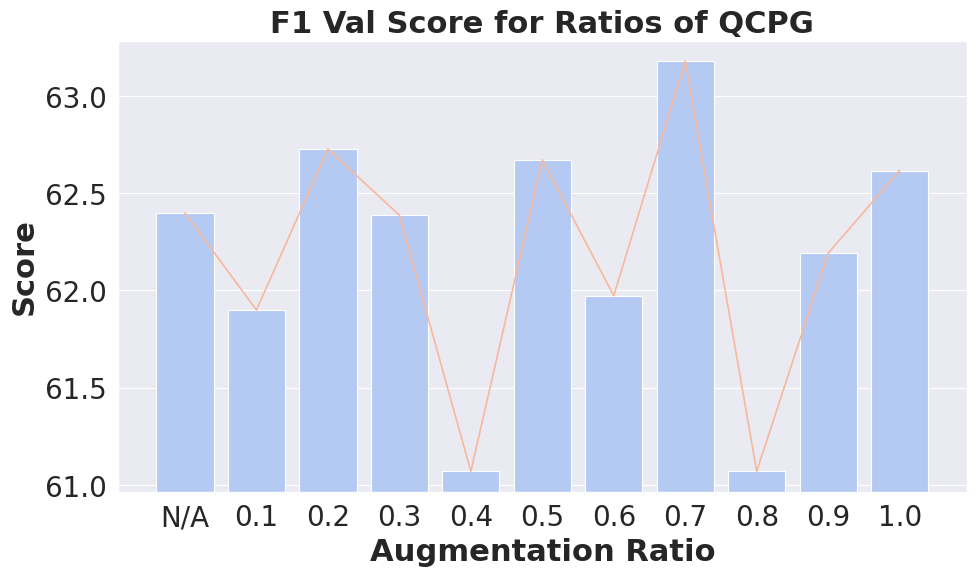

/tmp/ipykernel_577854/1426354803.py:35: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=filtered_df, x='Ratio', y='Score', hue='Metric',  palette=palette, ax=ax)


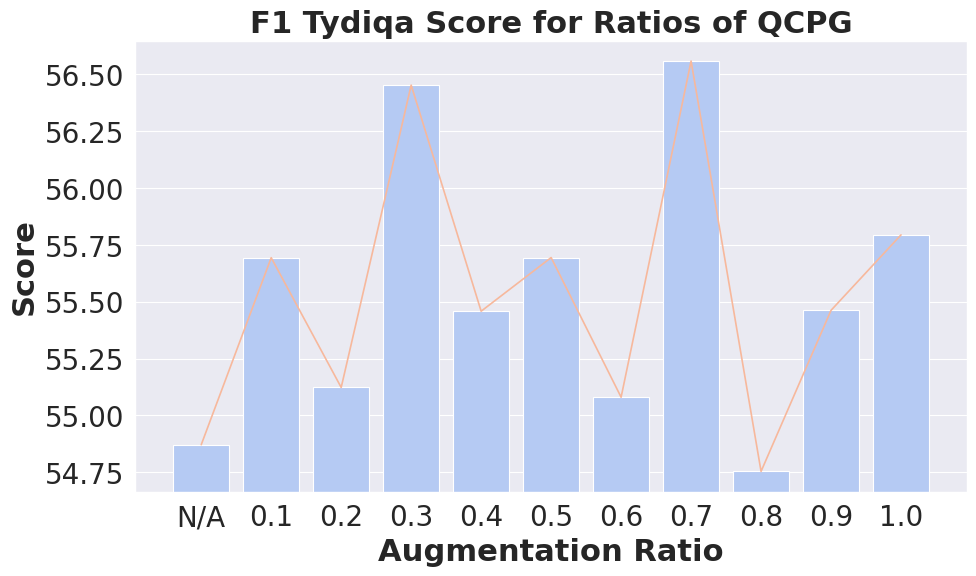

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_scores(dataframe, test_dataset="tydiqa", grouped=True):
    # Define the ratio column
    sns.set_theme()
    sns.set_context("paper", 1.5)
    dataframe = dataframe.copy()
    dataframe['Ratio'] = dataframe['augment_ratio'].astype(str)

    # Melt the dataframe to facilitate seaborn plotting
    melted_df = dataframe.melt(id_vars=['Ratio'],
                              value_vars=['val_exact_match', 'val_f1', 
                                          f'test_{test_dataset}_exact_match', f'test_{test_dataset}_f1'],
                              var_name='Metric', value_name='Score')

    # If not grouped, filter out the 'exact_match' metrics
    if not grouped:
        melted_df = melted_df[melted_df['Metric'].str.contains('f1')]

    # Split the metrics into categories
    melted_df['Type'] = melted_df['Metric'].apply(lambda x: x.split('_')[0])
    melted_df['Metric'] = melted_df['Metric'].apply(lambda x: x.split('_')[-1])

    for score_type in ['val', 'test']:
        fig, ax = plt.subplots(figsize=(10, 6))
        palette = sns.color_palette("coolwarm", n_colors=2)

        # Filter by type
        filtered_df = melted_df[melted_df['Type'] == score_type]

        # Plot the barplot
        sns.barplot(data=filtered_df, x='Ratio', y='Score', hue='Metric',  palette=palette, ax=ax)

        # Overlay line trends
        if not grouped:
            sns.lineplot(data=filtered_df, x='Ratio', y='Score', hue='Metric', markers=True, dashes=False, palette=palette[1:], ax=ax, legend=False)

        # Add labels and title
        plt.xlabel('Augmentation Ratio', weight="bold", fontsize=22)
        plt.ylabel('Score', weight="bold", fontsize=22)

        # Adjust y-axis to zoom in on the data
        min_score = filtered_df['Score'].min()
        max_score = filtered_df['Score'].max()
        margin = (max_score - min_score) * 0.05  # 5% margin
        plt.ylim(min_score - margin, max_score + margin)

        if not grouped:
            # title = f'F1 {score_type.capitalize()} Score for Ratios of QCPG 0.8 + LLM GEC'
            title = f'F1 {score_type.capitalize()} Score for Ratios of QCPG'
            plt.legend().remove()
        else:
            if score_type == "tydiqa":
                # title = f'TyDiQA Scores for Ratios of QCPG 0.8 + LLM GEC'
                title = f'TyDiQA Scores for Ratios of QCPG'
            else:
                title = f'{score_type.capitalize()} Scores for Ratios of QCPG 0.8 + LLM GEC'
        if score_type == "test":
            title = title.replace(score_type.capitalize(), test_dataset.capitalize()) 
        plt.title(title, weight="bold", fontsize=22)
        
        # Set other fonts to 22
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        # Show plot
        plt.tight_layout()
        plt.savefig(f'../results/{score_type}_barchart_scores.png', dpi=300)
        plt.savefig(f'../results/{score_type}_barchart_scores.pdf', dpi=300, format='pdf')
        plt.show()

# Example usage
# Assuming the input DataFrame is stored in the variable 'data'
plot_scores(filter_col_best_runs, test_dataset="tydiqa", grouped=False)  # Only plots F1 bars

# Bar Chart for Counting Instances

In [13]:
data

,Name,test_tydiqa_exact_match,test_xquad_exact_match,Created,Runtime,End Time,ID,Notes,State,Updated,...,test_tydiqa_f1,test_xquad_f1,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1,augmentation_type
0,th_wordnet_aug_1.0,40.238780,32.796610,2023-08-31T18:53:58.000Z,1575,2023-08-31T19:20:13.000Z,yhde47c9,-,finished,2023-08-31T19:20:13.000Z,...,55.533338,48.800646,38303818190876160,1.305399,1425.8065,126.539,1.978,50.709220,62.747362,th_wordnet
1,th_wordnet_aug_0.9,41.123148,33.644068,2023-08-31T18:27:53.000Z,1502,2023-08-31T18:52:55.000Z,jvki7gyz,-,finished,2023-08-31T18:52:55.000Z,...,56.136859,48.335103,36388839584947200,1.272824,1357.7328,126.240,1.974,50.620567,62.870342,th_wordnet
2,th_wordnet_aug_0.8,41.609551,33.559322,2023-08-31T18:02:56.000Z,1434,2023-08-31T18:26:50.000Z,n89jf4b3,-,finished,2023-08-31T18:26:50.000Z,...,56.645867,49.039085,34473860979018240,1.283190,1289.8767,125.888,1.969,51.684397,63.779671,th_wordnet
3,th_wordnet_aug_0.7,41.034711,33.305085,2023-08-31T17:39:09.000Z,1364,2023-08-31T18:01:53.000Z,jfrvaznk,-,finished,2023-08-31T18:01:53.000Z,...,56.090129,48.483559,32558882373089280,1.359049,1221.7292,125.527,1.964,52.526596,64.220596,th_wordnet
4,th_wordnet_aug_0.6,39.089100,32.796610,2023-08-31T17:16:34.000Z,1292,2023-08-31T17:38:06.000Z,2wziqc6r,-,finished,2023-08-31T17:38:06.000Z,...,55.132968,48.347711,30643903767160320,1.315584,1153.4173,125.141,1.959,50.576241,62.590742,th_wordnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,th_aug_0.4,42.007517,33.898305,2023-08-29T16:35:20.000Z,1200,2023-08-29T16:55:20.000Z,8blhu48l,-,finished,2023-08-29T16:55:20.000Z,...,56.433435,48.039027,26746221702165890,1.619834,1055.6772,119.629,1.866,50.797872,62.669976,th
137,th_aug_0.3,40.017687,33.050847,2023-08-29T16:15:49.000Z,1109,2023-08-29T16:34:18.000Z,se9jnq99,-,finished,2023-08-29T16:34:18.000Z,...,54.696730,47.120647,24832516917926016,1.553381,966.0113,121.396,1.894,49.911348,61.683762,th
138,th_aug_0.2,40.437763,33.135593,2023-08-29T15:41:19.000Z,1558,2023-08-29T16:07:17.000Z,rvm4ytuo,-,finished,2023-08-29T16:07:17.000Z,...,55.647457,47.325783,34375776708958464,1.320836,1417.1706,114.577,1.789,49.734043,61.849780,th
139,th_aug_0.1,39.641831,32.881356,2023-08-29T15:16:57.000Z,1399,2023-08-29T15:40:16.000Z,g5wdxs19,-,finished,2023-08-29T15:40:16.000Z,...,55.629496,46.898398,31504582621754110,1.324026,1254.5712,118.642,1.853,49.955674,61.805035,th


0      th_wordnet
1      th_wordnet
2      th_wordnet
3      th_wordnet
4      th_wordnet
          ...    
136            th
137            th
138            th
139            th
140      original
Name: augmentation_type, Length: 141, dtype: object

# SLEM

In [11]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'slem.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,Name,test_exact_match,test_f1,Runtime,Notes,State,Tags,eval/loss,eval/runtime,eval/samples_per_second,...,train/global_step,train/learning_rate,train/loss,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1
0,th_wordnet_aug_1.0,41.101175,54.713284,4566,-,finished,slem,2.396067,7.4860,301.362,...,5640,4.432624e-08,0.1107,76607636381752320,0.797324,4217.3024,85.562,1.337,51.595745,62.900263
1,th_wordnet_aug_0.9,38.593723,53.270918,4383,-,finished,slem,2.311900,7.5081,300.477,...,5360,5.597015e-08,0.1424,72777679169894400,0.839547,4040.7511,84.836,1.326,49.689716,61.851385
2,th_wordnet_aug_0.8,39.224969,52.982076,4195,-,finished,slem,2.241398,7.5166,300.134,...,5080,4.429134e-08,0.1569,68947721958036480,0.854922,3844.4154,84.476,1.321,47.916667,60.225599
3,th_wordnet_aug_0.7,39.049623,53.857083,3960,-,finished,slem,2.163667,7.4843,301.431,...,4800,4.687500e-08,0.1598,65117764746178560,0.906016,3628.1722,84.538,1.323,51.418440,63.044351
4,th_wordnet_aug_0.6,40.873225,54.903598,3795,-,finished,slem,2.073708,7.4701,302.002,...,4520,4.977876e-08,0.1623,61287807534320640,0.914990,3454.6001,83.564,1.308,51.108156,62.643491
5,th_wordnet_aug_0.5,38.874277,53.396272,3569,-,finished,slem,2.011191,7.4747,301.819,...,4220,4.739336e-08,0.1843,57318791454737280,0.965117,3248.3382,83.310,1.299,49.955674,61.758513
6,th_wordnet_aug_0.4,40.575136,54.565553,3374,-,finished,slem,1.937988,7.4820,301.525,...,3940,6.979695e-08,0.2443,53490108064568450,0.988335,3045.6076,82.933,1.294,51.329787,63.377183
7,th_wordnet_aug_0.3,39.751008,54.464701,3160,-,finished,slem,1.926060,7.5284,299.666,...,3660,5.464481e-08,0.2253,49661424674399620,1.022299,2850.1654,82.290,1.284,50.044326,61.790410
8,th_wordnet_aug_0.2,38.593723,53.001801,2960,-,finished,slem,1.929750,7.4688,302.058,...,3380,5.917160e-08,0.2402,45832741284230780,1.050339,2655.0688,81.542,1.273,48.758865,60.852043
9,th_wordnet_aug_0.1,39.873751,54.604449,2798,-,finished,slem,1.726772,7.4838,301.451,...,3100,8.064516e-08,0.3456,42004057894061950,1.155032,2468.6859,80.391,1.256,51.329787,62.564199


In [12]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
}

In [13]:
# Function to extract the augmentation type from the name
def get_augmentation_type(name):
    if name == "original":
        return "original"
    return name.rsplit("_", 2)[0]

# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name.rsplit("_", 1)[-1]

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    base_name = name.rsplit("_", 1)[0]
    return pretty_names[base_name]


# Apply the function to create a new column with the augmentation type
data['augmentation_type'] = data['Name'].apply(get_augmentation_type)

# Find the best performing model for each augmentation type based on the "test_exact_match" metric
best_models = data.loc[data.groupby('augmentation_type')['test_exact_match'].idxmax()]

# Resetting the index
best_models.reset_index(drop=True, inplace=True)

# Apply the functions to create the new columns
best_models['augment_ratio'] = best_models['Name'].apply(get_augment_ratio)
best_models['pretty_name'] = best_models['Name'].apply(get_pretty_name)

# Displaying the results
best_models[['Name', 'pretty_name', 'test_exact_match']]

,Name,pretty_name,test_exact_match
0,th_aug_1.0,Backtranslation,41.767491
1,th_fasttext_aug_1.0,FastText,41.294056
2,th_llm_gec_aug_1.0,LLM GEC,41.609679
3,th_llm_paraphrase_aug_1.0,LLM Paraphrase,41.977906
4,th_ltw2v_aug_0.7,LTW2Vec,41.574610
5,th_qcpg_0.2_aug_0.3,QCPG (0.2),39.908820
6,th_qcpg_0.2_llm_gec_aug_0.7,QCPG (0.2) + LLM GEC,41.048571
7,th_qcpg_0.5_aug_0.5,QCPG (0.5),39.891285
8,th_qcpg_0.5_llm_gec_aug_1.0,QCPG (0.5) + LLM GEC,41.171313
9,th_qcpg_0.8_aug_1.0,QCPG (0.8),40.715413


In [14]:
# Selecting columns that begin with "test" along with the "Name" column
test_columns = [col for col in data.columns if col.startswith("test")]
selected_columns = ['pretty_name', 'augment_ratio', "val_exact_match", "val_f1", "test_tydiqa_exact_match", "test_tydiqa_f1", "test_xquad_exact_match", "test_xquad_f1"]

# Selecting the relevant columns from the best models
best_models_test_metrics = best_models[selected_columns]

# Sorting the results by "test_exact_match" in descending order
best_models_test_metrics_sorted = best_models_test_metrics.sort_values(by='test_tydiqa_exact_match', ascending=False)

# Displaying the sorted results
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
3,LLM Paraphrase,1.0,50.531915,62.076332,43.820473,56.575072,34.915254,48.165749
0,Backtranslation,1.0,50.886525,62.636697,43.555163,56.553597,34.915254,47.548384
4,LTW2Vec,0.7,51.019504,62.361371,43.488835,56.457985,34.237288,47.769619
2,LLM GEC,1.0,51.329787,62.468544,43.400398,56.728930,34.745763,48.247302
1,FastText,1.0,51.108156,62.796860,43.223524,56.223975,33.898305,47.579879
10,QCPG (0.8) + LLM GEC,1.0,50.398936,62.347823,43.223524,56.672899,34.661017,48.776469
8,QCPG (0.5) + LLM GEC,1.0,49.556738,61.299276,43.201415,55.856818,33.389831,46.615318
12,WordNet,1.0,51.595745,62.900263,43.157197,56.756712,33.220339,46.880720
6,QCPG (0.2) + LLM GEC,0.7,50.576241,61.826054,42.936104,55.735174,33.813559,47.416250
11,Thai2Fit,0.4,50.576241,62.252530,42.891886,56.086161,33.898305,47.179939


In [15]:
# Round all numerical columns to 2 decimal places
best_models_test_metrics_sorted = best_models_test_metrics_sorted.round(2)
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
3,LLM Paraphrase,1.0,50.53,62.08,43.82,56.58,34.92,48.17
0,Backtranslation,1.0,50.89,62.64,43.56,56.55,34.92,47.55
4,LTW2Vec,0.7,51.02,62.36,43.49,56.46,34.24,47.77
2,LLM GEC,1.0,51.33,62.47,43.40,56.73,34.75,48.25
1,FastText,1.0,51.11,62.80,43.22,56.22,33.90,47.58
10,QCPG (0.8) + LLM GEC,1.0,50.40,62.35,43.22,56.67,34.66,48.78
8,QCPG (0.5) + LLM GEC,1.0,49.56,61.30,43.20,55.86,33.39,46.62
12,WordNet,1.0,51.60,62.90,43.16,56.76,33.22,46.88
6,QCPG (0.2) + LLM GEC,0.7,50.58,61.83,42.94,55.74,33.81,47.42
11,Thai2Fit,0.4,50.58,62.25,42.89,56.09,33.90,47.18


In [16]:
from IPython.display import Markdown
# Function to create a markdown table row (corrected)
def create_md_row(row, best_values, ignore_bestval_columns=["pretty_name", "augment_ratio"]):
    md_row = "| "
    for col, value in row.items():  # Using 'items' instead of 'iteritems'
        if value == best_values[col] and col not in ignore_bestval_columns:
            md_row += f"**{value}** | "
        else:
            md_row += f"{value} | "
    return md_row

best_values = best_models_test_metrics_sorted.max()

# Creating markdown table rows (corrected)
md_table_corrected = "| " + " | ".join(selected_columns) + " |\n"
md_table_corrected += "| " + " | ".join(["-" * len(col) for col in selected_columns]) + " |\n"
for _, row in best_models_test_metrics_sorted.iterrows():
    md_table_corrected += create_md_row(row, best_values) + "\n"

# Displaying the corrected markdown table
Markdown(md_table_corrected)

| pretty_name | augment_ratio | val_exact_match | val_f1 | test_tydiqa_exact_match | test_tydiqa_f1 | test_xquad_exact_match | test_xquad_f1 |
| ----------- | ------------- | --------------- | ------ | ----------------------- | -------------- | ---------------------- | ------------- |
| LLM Paraphrase | 1.0 | 50.53 | 62.08 | **43.82** | 56.58 | 34.92 | 48.17 | 
| Backtranslation | 1.0 | 50.89 | 62.64 | 43.56 | 56.55 | 34.92 | 47.55 | 
| LTW2Vec | 0.7 | 51.02 | 62.36 | 43.49 | 56.46 | 34.24 | 47.77 | 
| LLM GEC | 1.0 | 51.33 | 62.47 | 43.4 | 56.73 | 34.75 | 48.25 | 
| FastText | 1.0 | 51.11 | 62.8 | 43.22 | 56.22 | 33.9 | 47.58 | 
| QCPG (0.8) + LLM GEC | 1.0 | 50.4 | 62.35 | 43.22 | 56.67 | 34.66 | **48.78** | 
| QCPG (0.5) + LLM GEC | 1.0 | 49.56 | 61.3 | 43.2 | 55.86 | 33.39 | 46.62 | 
| WordNet | 1.0 | **51.6** | **62.9** | 43.16 | **56.76** | 33.22 | 46.88 | 
| QCPG (0.2) + LLM GEC | 0.7 | 50.58 | 61.83 | 42.94 | 55.74 | 33.81 | 47.42 | 
| Thai2Fit | 0.4 | 50.58 | 62.25 | 42.89 | 56.09 | 33.9 | 47.18 | 
| QCPG (0.8) | 1.0 | 50.71 | 62.05 | 42.21 | 55.92 | **35.0** | 48.69 | 
| QCPG (0.5) | 0.5 | 50.35 | 61.68 | 41.94 | 55.33 | 32.03 | 45.79 | 
| QCPG (0.2) | 0.3 | 49.56 | 61.23 | 41.83 | 55.42 | 32.54 | 46.7 | 


In [17]:
export_latex_tables(
        compute_relative_scores(best_models_test_metrics_sorted),
        "slem.tex"
)